In [1]:
#do this later from admin: !python -m pip install --upgrade pip


# TOC

0. [Imports](#first-bullet)
1. [EDA](#1.0-bullet)
2. [Feature Engineering](#2.0-bullet)  
 2.1 [Pt 1 - Regression](#2.1-bullet)  
 2.2 [Pt 2 - Classification](#2.2-bullet)
3. [Basic Model](#3.0-bullet)  
 3.1 [Pt 1 - Regression](#3.1-bullet)  
 3.2 [Pt 2 - Classification](#3.2-bullet)
4. [Reference and Planning](#4.0-bullet)

# Do not Run All cells - lots of charts

In [2]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
import requests
import json

#Youtube Data API Packages: 
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from googleapiclient.discovery import build
import argparse
"""
from googleapiclient.errors import HttpError"""

#Modeling
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.cluster import KMeans
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

#Time analysis
import time
import datetime as dt
"""from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf"""

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [3]:
df_main = pd.read_csv('./data/clean_data_nocomments_noviews_02.10.18.csv')

#create log features

In [4]:
df_main['view_log'] = df_main['viewCount'].map(lambda x: 0 if x==0 else np.log10(x)) #Which log to use???
df_main.publishedAt = pd.to_datetime(df_main.publishedAt)
df_main['week'] = df_main.publishedAt.map(lambda x: x.week)

df_main.description.fillna('', inplace=True)

df_main.tags.fillna('', inplace=True)

# <a class="anchor" id="1.0-bullet"> 1. EDA</a>

In [149]:
df_main.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent',
       ...
       'descr_word_yeah', 'descr_word_year', 'descr_word_yo', 'descr_word_you',
       'descr_word_young', 'descr_word_your', 'descr_word_youtu',
       'descr_word_youtub', 'descr_word_yt', 'descr_word_şarkısı'],
      dtype='object', length=542)

In [150]:
df_main.shape

(8694, 542)

In [151]:
print('   mean: ', df_main.viewCount.mean())
print('   median: ', df_main.viewCount.median())
print('   mode: ', df_main.viewCount.mode())

   mean:  53227002.69358178
   median:  3362238.5
   mode:  0    0
dtype: int64


In [152]:
#How skewed are we?
df_main.viewCount.mean() /  df_main.viewCount.median()

15.830823034588946

In [1]:
sns.distplot(np.log(df_main[df_main.viewCount>0].viewCount)) #Views
sns.distplot(np.log(df_main[df_main.commentCount>0].commentCount)) #Comments
sns.distplot(np.log(df_main[df_main.likeCount>0].likeCount)) #Likes
sns.distplot(np.log(df_main[df_main.dislikeCount>0].dislikeCount)) #dislikes -- very similar to comments 

NameError: name 'sns' is not defined

In [8]:
#Engagement
print('   comment ratio', (df_main.commentCount / df_main.viewCount).median())
print('   dislike ratio', (df_main.dislikeCount / df_main.viewCount).median())
print('   like ratio', (df_main.likeCount / df_main.viewCount).median())

   comment ratio 0.00034203926675335035
   dislike ratio 0.00022929015398251337
   like ratio 0.006713840631370753


In [85]:
#How many of these are over 20 minutes? A lot. 
df_main[df_main.duration>(20*60)].shape[0] / df_main.shape[0]

0.06970324361628709

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


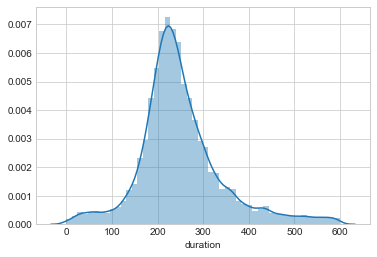

In [9]:
sns.distplot((df_main[df_main.duration<(10*60)].duration))

In [93]:
#Are they interesting?
df_main[df_main.duration>(20*60)]['viewCount'].max()

182653201

In [94]:
# A lot of relaxation stuff here. 
df_main[(df_main.duration>(20*60))&(df_main.viewCount>10000000)].loc[:, ['description', 'title', 'viewCount']]

,description,title,viewCount
38,The extended version of Clair de Lune. \r\r\n\...,Clair de Lune (Extended),21055960
481,Relaxdaily's instrumental background music: sl...,Background Music Instrumentals - relaxdaily - ...,76793517
562,3 hours of beautiful music (tracklist below) b...,3 Hours of Beautiful Music by Peder B. Helland,15990378
661,Subscribe for more classical music: http://bi...,The Best of Beethoven,31932211
1155,Pachelbel's Canon aka Canon in D is the name c...,Canon In D | Pachelbel's Canon | 1 Hour Version,19945987
1325,"Live At the Grand Rex, Paris April 2004, Cesar...",Cesaria Evora Live D'amor 2004 (Complete Concert),16876744
1344,Wolfgang Amadeus Mozart: Requiem in D minor (...,Mozart - Requiem in D minor (Complete/Full) [HD],34548812
1416,The clock is ticking and the world awaits... W...,I’d do it all | BTS: Burn the Stage Ep1,16584409
1547,Música relaxante para acalmar a mente e relaxa...,Música Relaxante - Acalmar a Mente e Relaxar,22912330
1706,★ QUER COLABORAR COM O NOSSO TRABALHO? Doe R$1...,"Música Anti-Depressão e Ansiedade, Equilibrio ...",23586767


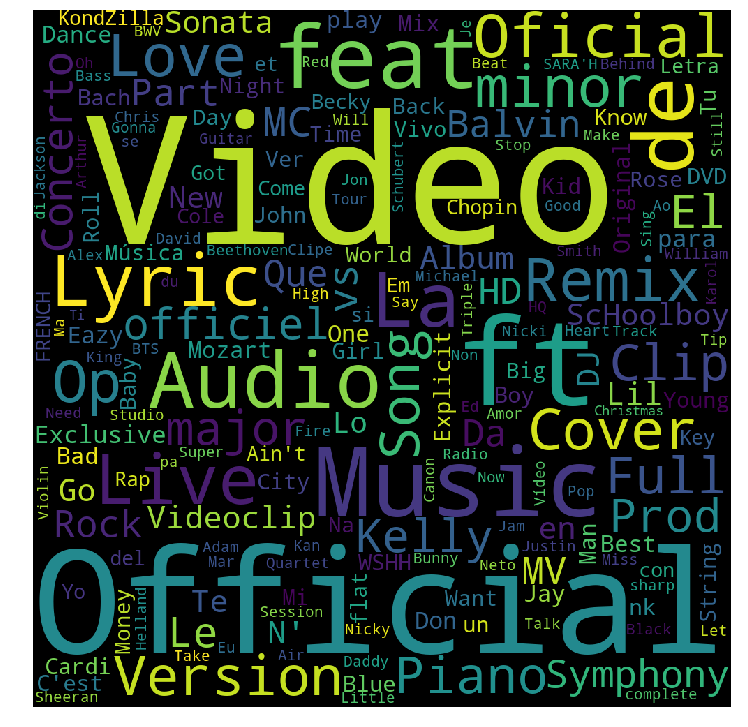

In [67]:
#Title Words
corpus_string1 = ''
for i in range(df_main.shape[0]):
    corpus_string1 = corpus_string1 + df_main.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string1)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

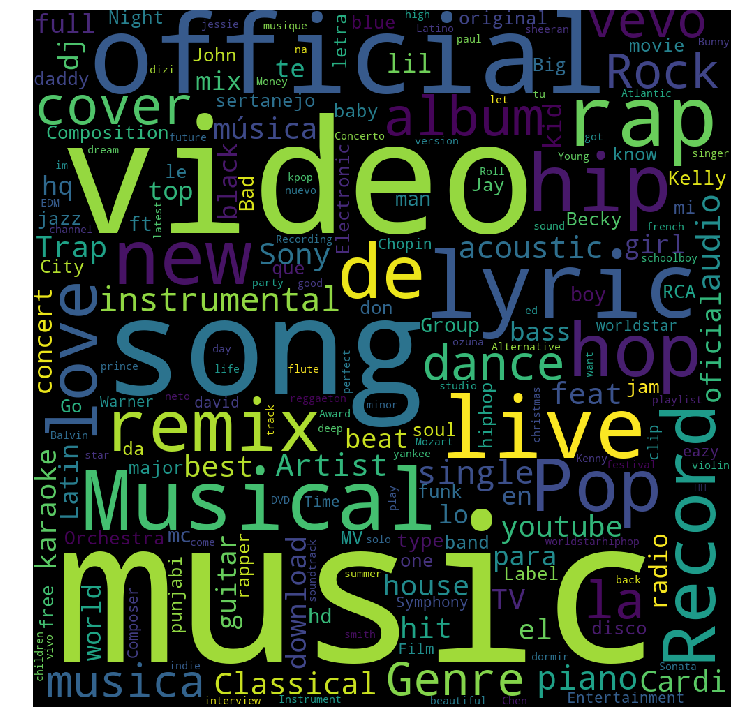

In [68]:
corpus_string2 = ''
for i in range(df_main.shape[0]):
    corpus_string2 = corpus_string2 + str(df_main.iloc[i]['tags'])

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string2)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

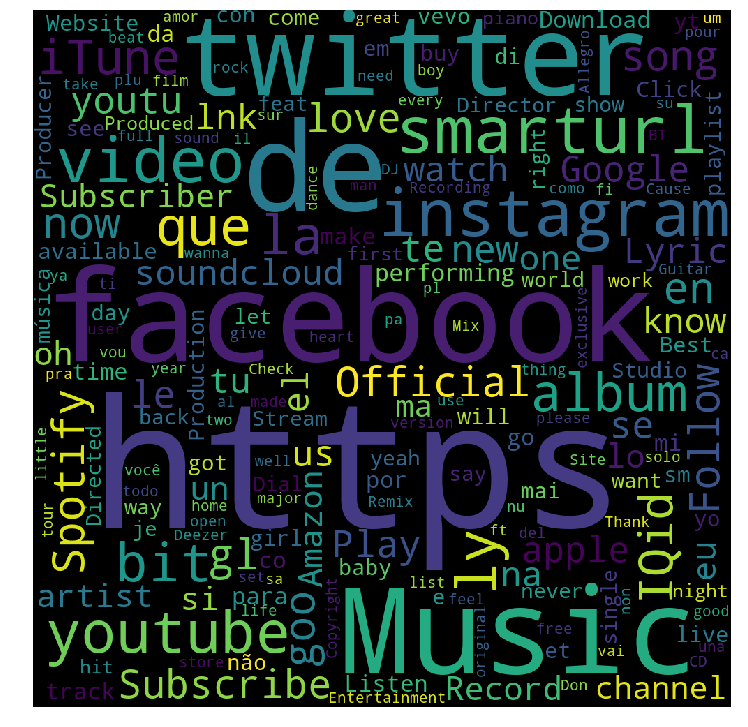

In [69]:
corpus_string3 = ''
for i in range(df_main.shape[0]):
    corpus_string3 = corpus_string3 + str(df_main.iloc[i]['description'])

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string3)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

In [117]:
TextBlob(corpus_string1).sentiment.polarity #Title

0.1242649255397477

In [118]:
TextBlob(corpus_string2).sentiment.polarity #Tags

0.11938258688631741

In [119]:
TextBlob(corpus_string3).sentiment.polarity #Description

0.18659543356966823

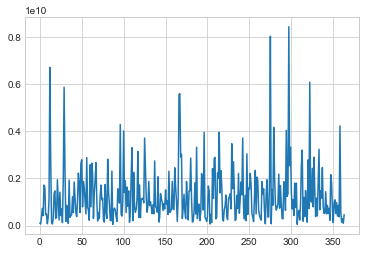

In [146]:
plt.plot([df_main[(df_main['year_day']==i)]['viewCount'].sum() for i in range(1,365)])

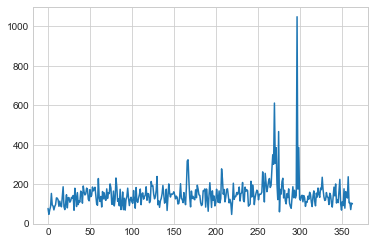

In [154]:
plt.plot([df_main[df_main['year_day']==i]['view_log'].sum() for i in range(1,365)])

In [28]:
year_day_view_list = [df_main[df_main['year_day']==i]['view_log'].sum() for i in range(1,365)]
year_day_view_list.index(max(year_day_view_list))

297

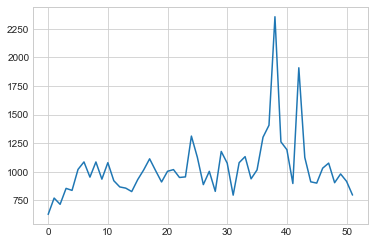

In [155]:
plt.plot([df_main[df_main['week']==i]['view_log'].sum() for i in range(1,53)])

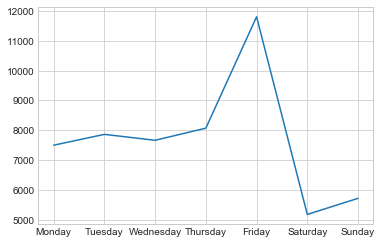

In [7]:
plt.plot(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], [df_main[df_main['week_day']==i]['view_log'].sum() for i in range(0,7)])

In [14]:
#Weekend releases:
df_main[df_main['week_day']==5]['view_log'].shape[0] + df_main[df_main['week_day']==6]['view_log'].shape[0]

1833

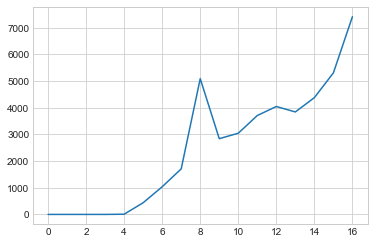

In [157]:
plt.plot([df_main[df_main['year']==i]['view_log'].sum() for i in range(1,18)])

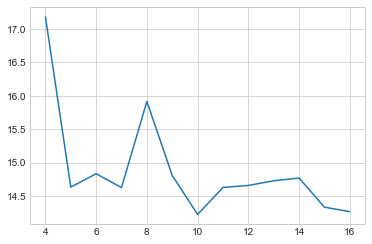

In [143]:
plt.plot([df_main[df_main['year']==i]['view_log'].mean() for i in range(1,18)])
#Something to note - only old videos with heaps of views are stil included in the most relevant search.
#2008 is the Golden Era of Youtube Music Videos

# <a class="anchor" id="2.0-bullet"> 2. Feature Engineering</a>

* Description
 * Sentiment
 * CVEC x
 * Overall word count
* Tags
 * Sentiment
 * CVEC
 * Num tags
* Title
 * Sentiment
 * CVEC predictions
 * feat / ft. 
 * Which letters
 * Length
* Measures
 * Log features
  * commentCount, 
  * dislikeCount, 
  * favoriteCount, 
  * likeCount
  * viewCount: view_log


## <a class="anchor" id="2.1-bullet">2.1 Adding Features</a>



### Description
 * Sentiment description_sentiment
 * Overall word count description_wordcount
 * CVEC matrix

In [4]:
df_main['description_sentiment'] = df_main['description'].map(lambda x: TextBlob(str(x)).sentiment.polarity) #Title)

In [5]:
df_main['description_wordcount'] = df_main['description'].map(lambda x: str(x).count(' '))

In [83]:
df_corp3= pd.DataFrame([corpus_string3], index=[1])
cvec = CountVectorizer()
df_cvec_description = cvec.fit_transform(df_corp3[0]).todense()

df_cvec_description = pd.DataFrame(df_cvec_description, columns = cvec.get_feature_names())

descr_words = [col for col in df_cvec_description.columns if df_cvec_description[col].sum()>200]

lmtzr = PorterStemmer()
lem_list = []
for word in descr_words:
    lem_list.append(lmtzr.stem(word))
lem_list = list(set(lem_list))

for word in lem_list:
    df_main[str('descr_word_' + word)] = df_main.description.str.count(word)

### Tags
 * Sentiment
 * CVEC
 * Num tags

In [6]:
df_main['tags_sentiment'] = df_main['tags'].map(lambda x: TextBlob(str(x)).sentiment.polarity)

df_main['tags_wordcount'] = df_main['tags'].map(lambda x: str(x).count(','))

In [84]:
df_corp2= pd.DataFrame([corpus_string2], index=[1])
cvec = CountVectorizer()
df_cvec_description = cvec.fit_transform(df_corp2[0]).todense()

df_cvec_description = pd.DataFrame(df_cvec_description, columns = cvec.get_feature_names())

descr_words = [col for col in df_cvec_description.columns if df_cvec_description[col].sum()>200]

lmtzr = PorterStemmer()
lem_list = []
for word in descr_words:
    lem_list.append(lmtzr.stem(word))
lem_list = list(set(lem_list))

for word in lem_list:
    df_main[str('tag_word_' + word)] = df_main.description.str.count(word)

### Title
 * Sentiment
 * Wordcount
 * CVEC predictions
 * feat / ft. 
 * Which letters
 * Length

In [7]:
df_main['title_sentiment'] = df_main['title'].map(lambda x: TextBlob(str(x)).sentiment.polarity)
df_main['title_wordcount'] = df_main['title'].map(lambda x: str(x).count(' '))

In [8]:
feat_words = ['feat', 'ft', 'featur']
def find_feats(text_string):
    text_string = text_string.lower()
    for word in feat_words:
        if word in text_string:
            return 1
    return 0
df_main['title_featuring'] = df_main['title'].map(lambda x: find_feats(x))

In [9]:
#Pitbull Affect
df_main[df_main['title_featuring']==1]['viewCount'].mean() / df_main[df_main['title_featuring']==0]['viewCount'].mean()

2.7215569134095174

In [10]:
letters = 'abcdefghijklmnopqrstuvwxyz'
for letter in letters:
    df_main[str('intitle_' + letter)] = df_main.title.str.count(letter)

In [16]:
df_main.intitle_e.corr(df_main.viewCount)

-0.0008536683101137517

In [11]:
dict_letters = {}
for letter in letters:
     dict_letters[letter] = df_main['intitle_'+letter].corr(df_main.viewCount)

sorted_by_value = sorted(dict_letters.items(), key=lambda kv: kv[1])

sorted_by_value

[('p', -0.03946633529244498),
 ('b', -0.03627860822539604),
 ('s', -0.03514826615159203),
 ('r', -0.027404929357270034),
 ('m', -0.027279484193756025),
 ('v', -0.026577086391472934),
 ('g', -0.02449266351460775),
 ('z', -0.02239357878936587),
 ('x', -0.021399371434054345),
 ('j', -0.02137359415623475),
 ('o', -0.02070718509871761),
 ('w', -0.014108489879490082),
 ('n', -0.01217125240695847),
 ('q', -0.007299119232882848),
 ('c', -0.006712985589303544),
 ('t', -0.002084847977073171),
 ('u', -0.0010196579409205704),
 ('e', -0.0008536683101137517),
 ('y', 0.0009580579318070765),
 ('l', 0.004137700055334141),
 ('h', 0.006063303890828201),
 ('d', 0.020119382926463092),
 ('a', 0.027141420170195565),
 ('k', 0.030337263703497507),
 ('i', 0.04360353842855648),
 ('f', 0.13541303454369089)]

Look at f go!

In [12]:
df_main['title_length'] = df_main['title'].map(lambda x: len(str(x)))

In [13]:
df_main.title_length.corr(df_main.view_log)

0.02566059747225844

In [85]:
df_corp1= pd.DataFrame([corpus_string1], index=[1])
cvec = CountVectorizer()
df_cvec_description = cvec.fit_transform(df_corp1[0]).todense()

df_cvec_description = pd.DataFrame(df_cvec_description, columns = cvec.get_feature_names())

descr_words = [col for col in df_cvec_description.columns if df_cvec_description[col].sum()>200]

lmtzr = PorterStemmer()
lem_list = []
for word in descr_words:
    lem_list.append(lmtzr.stem(word))
lem_list = list(set(lem_list))

for word in lem_list:
    df_main[str('title_word_' + word)] = df_main.description.str.count(word)

In [21]:
len(lem_list)

17

### Other

In [29]:
df_main[(df_main['likeCount']>0)&(df_main['viewCount']==0)]['likeCount']

Series([], Name: likeCount, dtype: int64)

In [28]:
df_main.at[5632, 'likeCount'] = 0
df_main.at[5845, 'likeCount'] = 0
df_main.at[6235, 'likeCount'] = 0
df_main.at[6236, 'likeCount'] = 0
df_main.at[6279, 'likeCount'] = 0
df_main.at[8498, 'likeCount'] = 0

In [36]:
df_main['lv_ratio'] = (df_main['likeCount'] / df_main['viewCount'])

In [73]:
df_main['lv_ratio'].fillna(1, inplace=True)

df_main.loc[: , ['lv_ratio', 'viewCount', 'view_log']].corr()

,lv_ratio,viewCount,view_log
lv_ratio,1.000000,-0.063052,-0.316753
viewCount,-0.063052,1.000000,0.376019
view_log,-0.316753,0.376019,1.000000


## <a class="anchor" id="2.2-bullet">2.2 Classification</a>



# <a class="anchor" id="3.0-bullet"> 3. Basic Model</a>

## <a class="anchor" id="3.1-bullet">3.1 Regression</a>



In [55]:
df_main.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent', 'likeCount', 'publishedAt',
       'regionRestriction', 'tags', 'title', 'vidId', 'viewCount',
       'request_token', 'letter_search', 'contentRating', 'year', 'month',
       'month_day', 'year_day', 'week_day', 'view_log', 'week',
       'description_sentiment', 'description_wordcount', 'tags_sentiment',
       'tags_wordcount', 'title_sentiment', 'title_wordcount',
       'title_featuring', 'intitle_a', 'intitle_b', 'intitle_c', 'intitle_d',
       'intitle_e', 'intitle_f', 'intitle_g', 'intitle_h', 'intitle_i',
       'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n',
       'intitle_o', 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s',
       'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w', 'intitle_x',
       'intitle_y', 'intitle_z', 'title_length', 'lv_ratio'],
      dtype='object')

In [86]:
cols_exclude = ['letter_search', 'request_token', 'channelTitle', 'defaultLanguage', 'description', 'tags', 
               'title', 'vidId', 
               'month', 'publishedAt', 
               'viewCount','view_log',  'commentCount', 'favoriteCount', 'dislikeCount', 'likeCount']
cols_include_initial = [col for col in df_main.columns if col not in cols_exclude]
y = df_main.view_log

In [87]:
#def test_model(additional_columns_exlude=[]):
#others_to_exclude = additional_columns_exlude
cols_include_final = [col for col in df_main.columns if col not in cols_exclude ]#and col not in others_to_exclude

X = df_main.loc[:, cols_include_final]
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [88]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [40]:
model = GradientBoostingRegressor()
model.fit(X_train_sc, y_train)
    #return model, X_test_sc, y_test, ss

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [42]:
#model, X_test_sc, y_test, ss = test_model()
model.score(X_test_sc, y_test)

0.5303109241726187

In [92]:
paramz = {
    'n_estimators': [180, 225], 
    'subsample' : [.9, .8, .7],
    'max_depth': [3, 5, 7]
}
gs = GridSearchCV(GradientBoostingRegressor(), param_grid=paramz)
gs.fit(X_train_sc, y_train)

KeyboardInterrupt: 

In [ ]:
gs.score(X_test_sc, y_test)
#Score to beat: .5412844284274065 with best params:
#{'max_depth': 3, 'n_estimators': 180, 'subsample': 0.9}

In [ ]:
gs.best_params_

In [107]:
"""for colz in cols_include_initial:
    cols_include_final = [col for col in df_main.columns if col not in cols_exclude and col != colz]

    X = df_main.loc[:, cols_include_final]

    X_train, X_test, y_train, y_test=train_test_split(X, y)
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    model = GradientBoostingRegressor()
    model.fit(X_train_sc, y_train)
    _this_score = model.score(X_test_sc, y_test)
    print('   exclude: {}, score: {}'.format(colz,_this_score ))
    if _this_score<base_score:
        best_to_remove.append(colz)"""
"""Removing best to remove actually makes the model worse."""

   exclude: caption, score: 0.4506522768603689
   exclude: definition, score: 0.456403898513306
   exclude: duration, score: 0.4193551881956773
   exclude: licensedContent, score: 0.3945045071681035
   exclude: regionRestriction, score: 0.4360957787223314
   exclude: contentRating, score: 0.44014210931131204
   exclude: year, score: 0.40663308845559887
   exclude: month_day, score: 0.46881973669928423
   exclude: year_day, score: 0.43834407130779074
   exclude: week_day, score: 0.44838234053842596
   exclude: week, score: 0.4548864600965362
   exclude: description_sentiment, score: 0.4571258803425873
   exclude: description_wordcount, score: 0.44485611429061955
   exclude: tags_sentiment, score: 0.45587569316122256
   exclude: tags_wordcount, score: 0.44854450616631614
   exclude: title_sentiment, score: 0.4272494501419024
   exclude: title_wordcount, score: 0.4466738965717165
   exclude: title_featuring, score: 0.42243292704912416
   exclude: intitle_a, score: 0.45618789689444217
   e

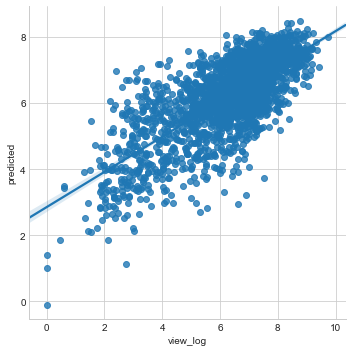

In [63]:
df_residuals = pd.DataFrame(y_test)

df_residuals['predicted'] = gs.predict(X_test_sc)
df_residuals['residuals'] = df_residuals.predicted - df_residuals.view_log 

sns.lmplot('view_log', 'predicted', data=df_residuals)

In [65]:
df_big = df_main[df_main.viewCount > 100000000]
df_big_ss = ss.transform(df_big.loc[:, cols_include_initial])

df_big['predicted'] = 10**gs.predict(df_big_ss)

#df_big.viewCount = df_big.viewCount.map(lambda x: '{:.6g}'.format(x))

df_big.loc[:, ['title', 'viewCount', 'predicted']].sort_values(by='viewCount', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,title,viewCount,predicted
7479,Luis Fonsi - Despacito ft. Daddy Yankee,5555912002,1.046082e+08
4268,Ed Sheeran - Shape of You [Official Video],3827104659,6.046835e+07
7190,Wiz Khalifa - See You Again ft. Charlie Puth [...,3788737518,2.874485e+08
5540,Mark Ronson - Uptown Funk ft. Bruno Mars,3256917992,9.979310e+07
3634,PSY - GANGNAM STYLE(강남스타일) M/V,3218413082,2.557728e+07
569,Justin Bieber - Sorry (PURPOSE : The Movement),3014897224,8.657425e+07
7417,Maroon 5 - Sugar,2756205542,1.209376e+07
7514,Taylor Swift - Shake It Off,2650920924,5.626524e+07
5506,Katy Perry - Roar (Official),2638406673,8.192447e+07
627,Enrique Iglesias - Bailando (Español) ft. Desc...,2582945265,6.961266e+07


## <a class="anchor" id="3.2-bullet">3.2 Neural Net</a>



In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [52]:
X = df_main.loc[:, cols_include_initial]

In [53]:
#for state in range(5, 56, 10):
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

model = Sequential()
#this does input and first activation
model.add(Dense(X_train_sc.shape[1], activation='relu', input_dim=X_train_sc.shape[1]))
model.add(Dropout(.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation=None)) #1 neuron
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=40, batch_size=50, verbose=0)
preds = model.predict(X_test_sc)
print( 'score: ', r2_score(y_test, preds))

score:  0.017801094505758397


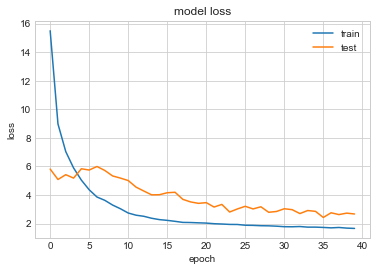

In [54]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show();

In [55]:
#Save point 1
#df_new.to_csv('./data/alphabet_pull_init_01.10.18.csv', index=False)

In [ ]:
#nope: AdaBoostRegressor, 

## <a class="anchor" id="3.2-bullet">3.2 Interpretation and Advanced Cleaning</a>


# <a class="anchor" id="4.0-bullet"> 4.0 Reference and Planning</a>

In [ ]:
# all views over 400M https://www.youtube.com/playlist?list=PLirAqAtl_h2r5g8xGajEwdXd3x1sZh8hC

Are there bots? would explain difference in like / view ratio.

### Next Steps
Feature engineering
* NLP - check only most 1000 common words according to corpus string (or above threshold) xx
* Comments / likes to views ratio? x
* Duration group classifications instead of just duration (eh)

Classification
* Do breakpoints by order of magnitude? That's sort of where this started. By analyzing differences, can establish if/then statements
* Find k classifications


## Columns Decisions
* Convert 
 * Duration x
 * PublishedAt X
* Get dummies: 
 * definition, (0 for sd, 1 for hd)
 * licensedContent (map)
 * Caption (map)
* Drop:
 * Projection, 
 * Dimension
 * 3d movies,
 * livebroadcast
 * CategoryID
 * channelID (already have title, which has text!!)
 * LiveBroadCastContent
* Leave in for EDA, but anticipate dropping during most analysis (basically stuff that might be interesting)
 * Region restriction should be dropped until modeling - consider bringing this back later
 * ContentRating - insignificant but interesting
 * Could look at channelTitle
 * request_token
 * letter_search
 * defaultLanguage, (might be better as 1 / 0 for set / not set. leave for model)